In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as pit
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


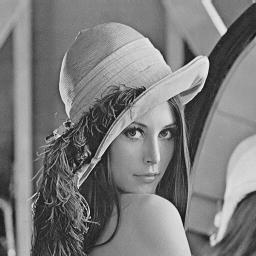

In [3]:
img = cv2.imread('/content/gdrive/MyDrive/ip/Images/lena256.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#pit.imshow (gimg1, cmap= 'gray')
cv2_imshow(gimg1)

In [4]:
def saturation(value):
  if(value > 255):
    return 255
  elif(value < 0):
    value = 0
    return value


In [37]:
kernel3 = np.ones((3,3), np.float32)/9
kernel5 = np.ones((5,5), np.float32)/25
kernel7 = np.ones((7,7), np.float32)/49

위 과정을 걸치면 밝기가 일정하게 됨.

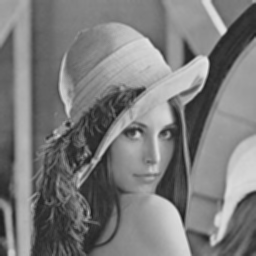

In [6]:
output = cv2.filter2D(gimg1, -1, kernel3)
cv2_imshow(output)

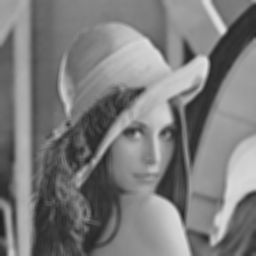

In [10]:
output = cv2.filter2D(gimg1, -1, kernel5)
cv2_imshow(output)

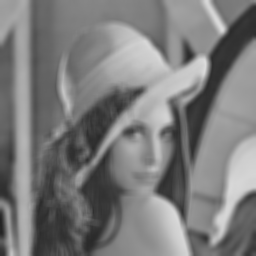

In [36]:
output = cv2.filter2D(gimg1, -1, kernel7)
cv2_imshow(output)

In [35]:
gOut = np.zeros((gimg1.shape[0],gimg1.shape[1]), dtype=np.ubyte)

3by3으로

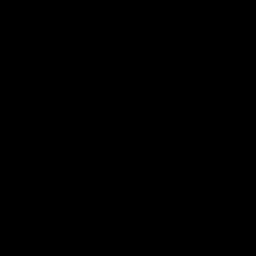

In [34]:
def saturation(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

for h in range(1, gimg1.shape[0]-1):
    for w in range(1, gimg1.shape[1]-1):
        sum = 0
        for i in range(-1, 2):
            for j in range(-1, 2):
                sum += gimg1[h+i, w+j] * kernel3[i+1, j+1]
        sum = saturation(sum)
        gOut[h, w] = sum

cv2_imshow(gOut)


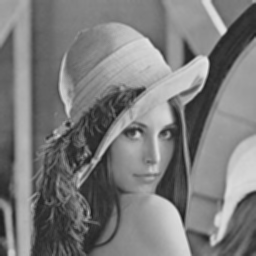

In [38]:
output = cv2.filter2D(gimg1, -1, kernel3)
cv2_imshow(output)

흐리게 만드는 것은 저주파 필터링>Lowpass, 선명하게 만드는것(눈)은 고주파 필터링>Highpass

평평할 수록 블러가 강해짐. 커널의 크기가 클수록 블러가 강해짐(스무딩 효과가 커짐)

In [39]:
kernel3[0][0] = -1/9
kernel3[0][1] = -1/9
kernel3[0][2] = -1/9
kernel3[1][0] = -1/9
kernel3[1][1] = 1/9
kernel3[1][2] = -1/9
kernel3[2][0] = -1/9
kernel3[2][1] = -1/9
kernel3[2][2] = -1/9

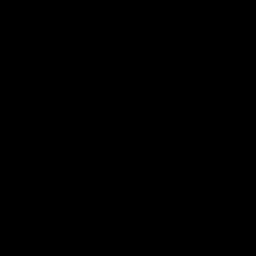

In [40]:
output = cv2.filter2D(gimg1, -1, kernel3)
cv2_imshow(output)

(256, 256, 3)


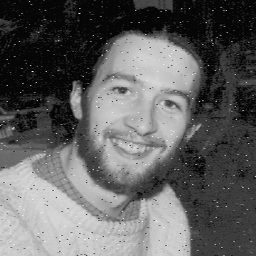

In [44]:
img = cv2.imread('/content/gdrive/MyDrive/ip/Images/fce(salt_pepper noise).bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#pit.imshow (gimg1, cmap= 'gray')
cv2_imshow(gimg1)

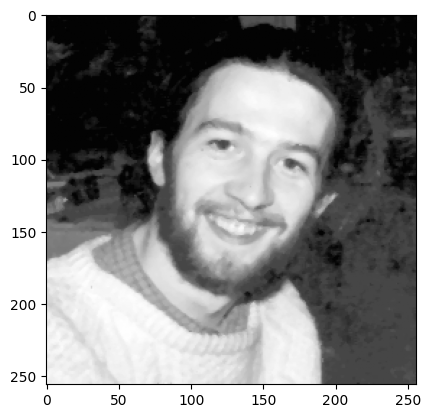

In [45]:
outlmg = cv2.medianBlur(gimg1,3)
pit.imshow(outlmg, cmap='gray')